# Import signal

In [79]:
from qampy import signals, equalisation, phaserec, helpers
import numpy as np

In [4]:
RecSig_I = np.zeros((10000,1))
RecSig_Q = np.zeros((10000,1))

Import signal from csv file

In [5]:
import csv
I_csv_fileName = '20Gbaud_50Gsample_-11dBmSignalPower_12dBmLOPower000_Ch2.csv'
Q_csv_fileName = '20Gbaud_50Gsample_-11dBmSignalPower_12dBmLOPower000_Ch4.csv'
with open (I_csv_fileName) as I_csv_file:
    csv_reader = csv.reader(I_csv_file,delimiter=',')
    line_count = 0
    for row in csv_reader:
        RecSig_I[line_count] = row[4]
        line_count += 1
    print(f'Processed {line_count} lines.')
with open (Q_csv_fileName) as Q_csv_file:
    csv_reader = csv.reader(Q_csv_file,delimiter=',')
    line_count = 0
    for row in csv_reader:
        RecSig_Q[line_count] = row[4]
        line_count += 1
    print(f'Processed {line_count} lines.')

Processed 10000 lines.
Processed 10000 lines.


Plot received signal in time domain

Populating the interactive namespace from numpy and matplotlib


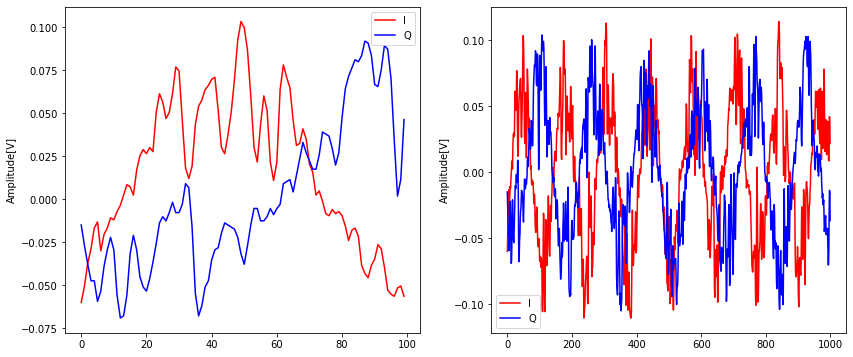

In [6]:
%pylab inline
# import matplotlib.pyplot as plt
figure(figsize=(14,6))
subplot(121)
plot(RecSig_I[0:100],'r',label='I')
plot(RecSig_Q[0:100],'b',label='Q')
ylabel('Amplitude[V]')
legend()
subplot(122)
plot(RecSig_I[0:1000],'r',label='I')
plot(RecSig_Q[0:1000],'b',label='Q')
ylabel('Amplitude[V]')
legend()
show()

Plot signal constellation diagram

In [20]:
# here we use bokeh for plotting as it is much faster
from bokeh.io import output_notebook, push_notebook
from bokeh.plotting import figure, show
import warnings
warnings.filterwarnings('ignore')
output_notebook()

Loading BokehJS ...

In [24]:
def plot_constellation(E):
    fig = figure(title="QPSK signal constellation", output_backend="webgl")
    fig.scatter(E[0].real, E[0].imag, color='blue', alpha=0.3, legend="X")
    fig.xaxis[0].axis_label = "In-Phase"
    fig.yaxis[0].axis_label = "Quadrature"
    show(fig)

In [22]:
RecSig = RecSig_I + 1j*RecSig_Q
RecSig = transpose(RecSig)

In [25]:
plot_constellation(RecSig)

# Digital signal processing 

Required DSP step:
1. Normalization
2. Match filtering
3. Synchronization
4. Frequency offset compensation
5. Phase recovery

Equlization

In [82]:
data = signals.SignalQAMGrayCoded(4, 10000, nmodes=1, fb=20e9)

- How can I use equlization function without 'os' contribute ?

In [80]:
wxy, err = equalisation.equalise_signal(RecSig, 2e-3, Ntaps=17)
sig_out = equalisation.apply_filter(RecSig, wxy)
plot_constellation(sig_out)

AttributeError: 'numpy.ndarray' object has no attribute 'os'